# <span style="color:darkblue"> Social Advertising Algorithm - Finding Potential Users </span>

***LIU Wenzhuo, SUN Wang, ZHANG Bolong, ZHANG Shangyuan***

[M2 DataScience](https://datascience-x-master-paris-saclay.fr/) - [Université ParisScalay](https://www.universite-paris-saclay.fr)

---

## <span style="color:darkblue"> Table of Contents </span>
### 1. Backgroud
### 2. Task description
### 3. Data description
- 3.1 Data files
- 3.2 Data desensitisation
- 3.3 User Feature Description
- 3.4 Ad Feature Description

## <span style="color:darkblue"> 1. Background </span>

Social relationship-based advertising (i.e., social advertising) has become one of the fastest growing categories of advertising in the Internet advertising industry.

Tencent Social Ads is the advertising arm of Chinese internet giant Tencent. Through the platform, it’s possible for clients to target users on Wechat (also known as Weixin), QQ and QZone, and other Tencent platforms. Advertisers claim to reach around 900 million users through Tencent in 2017.

This challenge comes from a real advertising product in Tencent's social advertising business - Lookalike. The purpose of this product is to identify other users who are similar to the target users from a large number of people based on the target data provided by the advertiser. In the actual case, Lookalike can help advertisers find potential consumers similar to existing consumers based on the existing data of advertisers, which finally helps to explore new customers and expand their business.

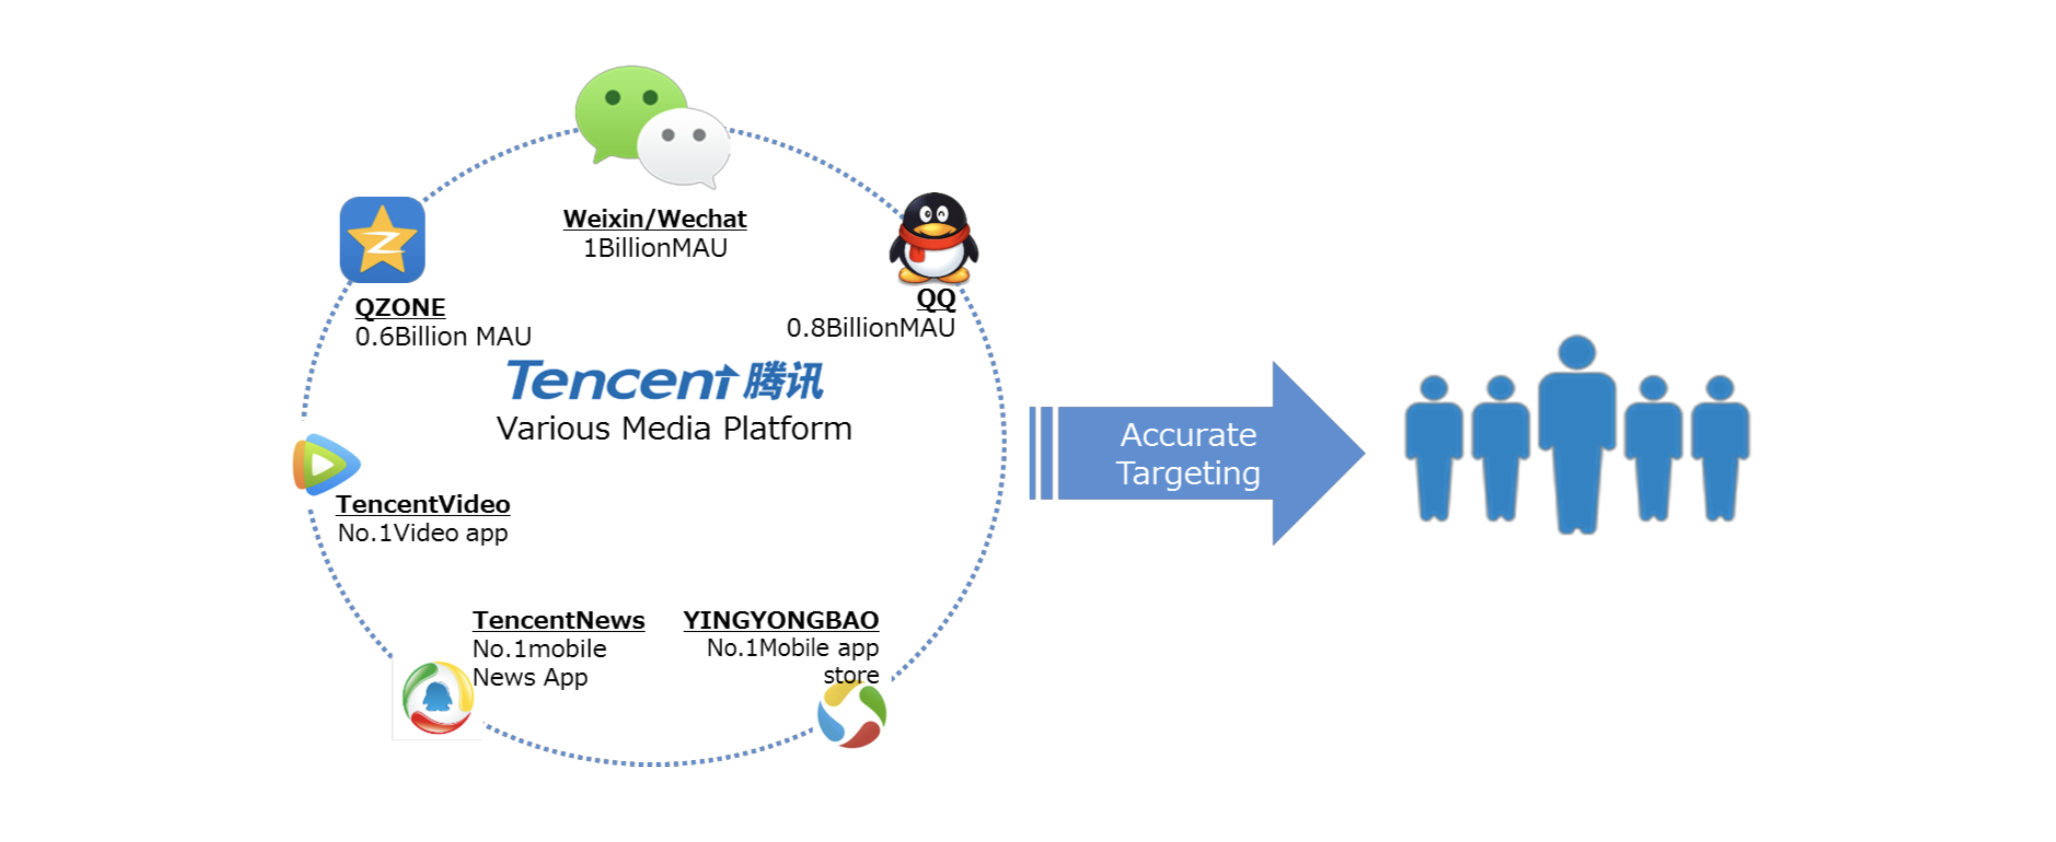

## <span style="color:darkblue"> 2. Task description </span>

Lookalike automatically calculates a similar population (called an extended population) based on a seed population (also known as a seed package) provided by the advertiser.
We will provide you with hundreds of seed populations, user features of a large number of candidate groups, and the advertisement features of the seed population. For the sake of business data security assurance, all data is desensitized data.

The entire data set is divided into training set and test set. The training set calibrates the users who belong to the seed package and the users who do not (i.e., positive and negative samples). The test set will detect if your algorithm can accurately classify the users into corresponding seed package in the test set. The seed packages in the training set and the test set are identical.

In order to test whether your algorithm can well understand the user and the seed population, you are required to provide the scores of candidate users belonging to each seed package in the test set (the higher the score, the more likely the candidate is a potential user of a package). For details, please refer to **[Evaluation Method]**


## <span style="color:darkblue"> 3. Data description </span>

### <span style="color:darkblue"> 3.1 Data files </span>

The time range for the data (after desensitization) given by [Tencent](https://www.tencent.com/en-us/) is 30 consecutive days. In general, the data is divided into four files: a training set, a test set, a user dataset and an advertisement dataset.

**[train.csv](https://drive.google.com/open?id=1JS5hIgYAkEF4SkRbP_MVTKTxJgytmlQW)** <br>
Each row represents a training sample, separated by commas, in the format: "aid, uid, label". Among them, aid uniquely identifies an ad, and uid uniquely identifies a user. The value of the sample label is +1 or -1, where +1 is the seed user and -1 is the non-seed user. To simplify the problem, a seed package only corresponds to one ad aid, and the two are one-to-one correspondence.

**[test.csv](https://drive.google.com/open?id=1j5FzFyx_vGO0t0W5Jq92i_ZZmuG5U1kS)** <br>
Each row represents a test sample, separated by commas, in the format: "aid, uid". The field meaning is the same as the training set.

**[test_truth.csv](https://drive.google.com/open?id=1LXxm_Qg8_wkuVCIlJmORtRTXgAHiZq-y)** <br>
Test set with label.

**[userFeature.csv](https://drive.google.com/open?id=1e0vc3mDqSB1yrWpvYxHdyflSZEaI9YFt)** <br>
Each row represents a user's feature data in the format: “uid|features”, and uid and features are separated by a vertical bar “|”. The feature is in [vowpal wabbit](https://github.com/JohnLangford/vowpal_wabbit) format: "feature_group1|feature_group2|feature_group3|...". Each feature_group represents a feature group, and multiple feature groups are also separated by vertical bar "|". If a feature group includes multiple values, it is separated by spaces. The format is: "feature_group_name fea_name1 fea_name2 ...", where fea_name is in the format of data number. For details of user feature, see **[User Feature Description]**

**[adFeature.csv](https://drive.google.com/open?id=1ife4Kh4x6Q9Uc4odGDaL6A35aNbFV8yi)** <br>
The format is: "aid, advertiserId, campaignId, creativeId, creativeSize, adCategoryId, productId, productType". Among them, aid uniquely identifies an advertisement, and the remaining fields are advertisement features, and the fields are separated by commas. For details of the ad feature, see the **[Ad Feature Description]**.

---
** In this challenge, we have already done a simple pre-processing of the data files for you. Now all the data is stored in training set and test set. You can get the data directly by calling the function, we will give a demonstration in the **[data analysis section]** **


### <span style="color:darkblue"> 3.2 Data desensitisation </span>

For data security reasons, uid, aid, user feature and advertisement feature are encrypted as follows:

**• uid**: Randomize the user ID and generate a non-repeating encrypted uid from 1 to N, where N is the total number of users (assuming the number of users is 100, all users are randomly scattered, and their serial numbers are used as uid , the value range is [1, 100]);

**• aid**: Generate an encrypted aid referring to the encryption method of uid;

**• user feature**: Generate the encrypted fea_name referring to the encryption method of uid;

**• ad feature**: Generate encrypted fields referring to the encryption method of uid


### <span style="color:darkblue"> 3.3 User Feature Description </span>

User features include the following feature groups (feature_group_name), where we take 0 if the feature values are unknown:

• Age **(age)**: Segmentation, each serial number represents an age segment

• Gender **(gender)**: Male / Female

• Marriage status **(marriageStatus)**: Single/Married status (multiple status can coexist)

• Education **(education)**: PhD/Master/Bachelor/High School/Junior/Primary School

• Consumption ability **(consumptionAbility)**: High / Low

• Geographic location **(LBS)**: Each serial number represents a geographic location

• Interest category **(interest)**: Five feature groups mined from different data sources, denoted by interest1, interest2, interest3, interest4, interest5, each interest feature group contains several interest IDs

• Keyword **(keyword)**: User’s detailed preferences comparing to interest category. The three feature groups mined from different data sources are represented by kw1, kw2, kw3, and each keyword feature group contains several keywords the user interested in

• Topic **(topic)**: User’s preferences mined using LDA. The three feature groups mined from different data sources are represented by topic1, topic2, topic3

• APP recent installation behavior **(appIdInstall)**: APP installed within 63 days, each APP is represented by a unique ID

• Active APP **(appIdAction)**: Active APP used by the user

• Internet connection type **(ct)**: WIFI/2G/3G/4G

• Operating system **(os)**: Android/IOS, regardless of version number

• Mobile operator **(carrier)**: Mobile operator, Mobile / Unicom / Telecom / Other

• House property **(house)**: Owning a house property or not

### <span style="color:darkblue"> 3.4 Ad Feature Description </span>

• Ad ID **(aid)**: Advertisement refers to the advertising creative and advertising display related settings created by the advertiser, including the basic information of an advertisement (name, delivery time, etc.), promotion target, delivery platform, specification, creative, bid, etc.

• Advertiser ID **(advertiserId)**: The account structure has four levels: account – campaign plan - advertisement - creative, account and advertiser are one-to-one correspondence

• Campaign plan ID **(campaignId)**: The campaign plan is a collection of advertisements (similar to a folder). Advertisers can place advertisements with the same conditions such as platform and budget in the same campaign plan for easy management

• Creative ID **(creativeId)**: the content of the ad shown to the user. There can be multiple sets of creative under one ad.

• Creative size **(creativeSize)**: the ceative size ID, which identifies the creative size

• Ad category **(adCategoryId)**: the ad category ID, defined by ad classification system

• Product ID **(productId)**: the promoted product ID, identified by the product id in the system

• Product type **(productType)**: the type of product corresponding to the ad delivery target (e.g. JD.com - merchandise, app - download)